# Assignment Instructions


Analyze storms data. This includes:

- Create 3 linear models, with at least one multiple linear model
- Create QQ chart for each model
- Include the following R Features at least once. 
- Include a written analysis of statistically significant features around the storms's category referencing the t-test(s) and linear models as evidence of your conclusions.


## R Features
* t.test()
* 3 uses of lm()
* 3 qq plots, one for each model

## Datasets
* storms

In [1]:
# Load libraries
library(lubridate)
library(tidyverse)

Warning message:
"package 'lubridate' was built under R version 3.6.2"
Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Warning message:
"package 'tidyverse' was built under R version 3.6.2"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'tibble' was built under R version 3.6.2"Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'readr' was built under R version 3.6.2"Warning message:
"package 'purrr' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.2"Warning message:
"package 'stringr' was built under R version 3.6.2"Warning message:
"package 'forcats' was built under R version 3.6.2"-- C

In [2]:
# Explore data structure
# Data: storms
storms %>% glimpse()

# Display help on data
? storms

Observations: 10,010
Variables: 13
$ name        <chr> "Amy", "Amy", "Amy", "Amy", "Amy", "Amy", "Amy", "Amy",...
$ year        <dbl> 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1...
$ month       <dbl> 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7...
$ day         <int> 27, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29, 29, 30, 30,...
$ hour        <dbl> 0, 6, 12, 18, 0, 6, 12, 18, 0, 6, 12, 18, 0, 6, 12, 18,...
$ lat         <dbl> 27.5, 28.5, 29.5, 30.5, 31.5, 32.4, 33.3, 34.0, 34.4, 3...
$ long        <dbl> -79.0, -79.0, -79.0, -79.0, -78.8, -78.7, -78.0, -77.0,...
$ status      <chr> "tropical depression", "tropical depression", "tropical...
$ category    <ord> -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0,...
$ wind        <int> 25, 25, 25, 25, 25, 25, 25, 30, 35, 40, 45, 50, 50, 55,...
$ pressure    <int> 1013, 1013, 1013, 1013, 1012, 1012, 1011, 1006, 1004, 1...
$ ts_diameter <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,...
$ hu_diameter <db

In [3]:
# Data processing

# normalize function
normalize <- function(x) (x - mean(x))/sd(x)

# droping NA values for ts_diameter and hu_diameter
df <- storms %>% select(lat, long, wind,pressure,ts_diameter,hu_diameter)
df <- drop_na(df)
df %>% summary()

      lat             long              wind           pressure     
 Min.   : 8.90   Min.   :-101.90   Min.   : 15.00   Min.   : 882.0  
 1st Qu.:17.00   1st Qu.: -79.50   1st Qu.: 35.00   1st Qu.: 984.0  
 Median :23.20   Median : -64.80   Median : 50.00   Median : 998.0  
 Mean   :23.85   Mean   : -63.36   Mean   : 54.53   Mean   : 990.9  
 3rd Qu.:30.10   3rd Qu.: -47.12   3rd Qu.: 65.00   3rd Qu.:1005.0  
 Max.   :48.10   Max.   :  -6.00   Max.   :160.00   Max.   :1017.0  
  ts_diameter       hu_diameter    
 Min.   :   0.00   Min.   :  0.00  
 1st Qu.:  69.05   1st Qu.:  0.00  
 Median : 138.09   Median :  0.00  
 Mean   : 166.76   Mean   : 21.41  
 3rd Qu.: 241.66   3rd Qu.: 28.77  
 Max.   :1001.18   Max.   :345.23  

### Linear Regression Model 1
Model predicts storm's wind using lat, long, pressure, ts_diameter and hu_diameter.


Call:
lm(formula = wind ~ lat + long + pressure + ts_diameter + hu_diameter, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.014  -5.289   0.316   5.587  31.126 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  54.5333     0.1459 373.833  < 2e-16 ***
lat          -1.5061     0.1559  -9.660  < 2e-16 ***
long          1.2084     0.1500   8.054 1.09e-15 ***
pressure    -25.1390     0.2861 -87.870  < 2e-16 ***
ts_diameter   0.6542     0.2190   2.987  0.00283 ** 
hu_diameter  -1.4505     0.2817  -5.149 2.77e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.608 on 3476 degrees of freedom
Multiple R-squared:  0.887,	Adjusted R-squared:  0.8869 
F-statistic:  5459 on 5 and 3476 DF,  p-value: < 2.2e-16


The coefficient confidence intervals

,2.5 %,97.5 %
(Intercept),54.2473024,54.8193259
lat,-1.8118249,-1.2004310
long,0.9142226,1.5025856
pressure,-25.6998847,-24.5780315
ts_diameter,0.2248406,1.0834687
hu_diameter,-2.0028024,-0.8981499


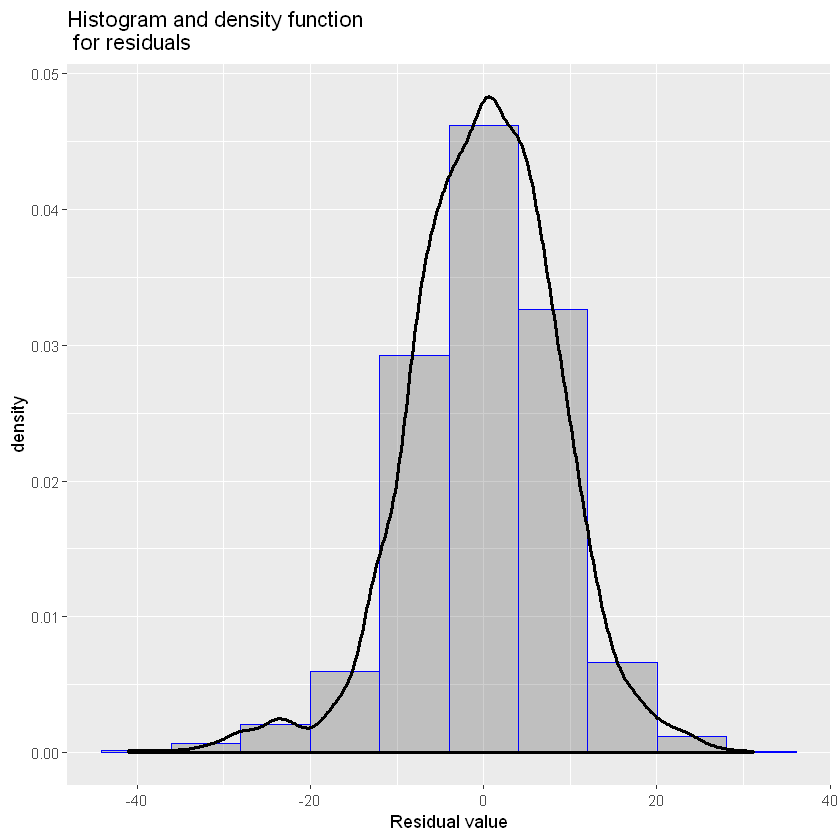

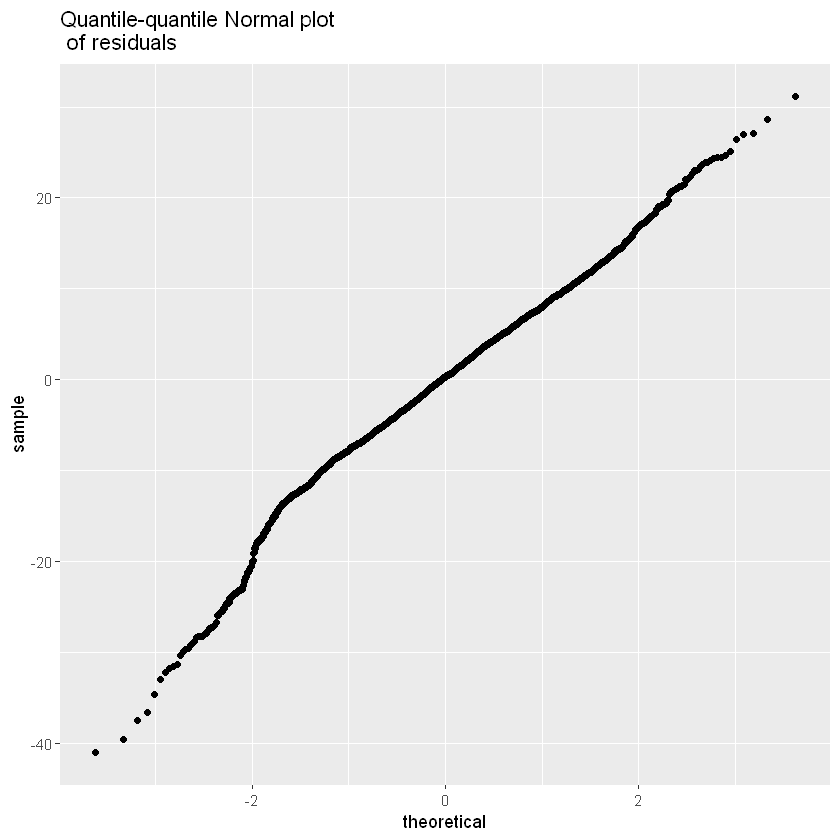

In [4]:
# Normalize data
df <- df %>% 
  mutate(lat = normalize(lat), 
         long = normalize(long), 
         pressure = normalize(pressure),
         ts_diameter = normalize(ts_diameter),
         hu_diameter = normalize(hu_diameter)) 
# 
#df %>% glimpse()
df.mod <- lm(wind ~ lat + long + pressure 
              + ts_diameter  + hu_diameter, data = df)
df.mod %>% summary()
cat('The coefficient confidence intervals')
df.mod %>% confint()

# Add the predicted score to the dataframe
df <- df %>% 
  mutate(predicted = predict(df.mod, data = df),
         resids = wind - predicted)
#df %>% head()

h <- df %>% 
  ggplot(aes(resids, ..density..)) + 
  geom_histogram(bins = 10, alpha = 0.3, color = 'blue') +
  geom_density(size = 1) +
  labs(title="Histogram and density function \n for residuals", x="Residual value")
print(h)
# print QQ plot
p <- df %>% 
  ggplot(aes(sample = resids)) + 
  geom_qq() + 
  labs(title="Quantile-quantile Normal plot \n of residuals")
print(p)

#### all model coefficients are significant coeeficients, they do not overlap with 0 and we want to see large t value and small pi (null hypoteses is coefficent is zero, so we want to reject that hypotesis),also we can see 2 or 3 starts - that means coeff are significats, also R squared is closer to 1 which is good,  and so far model looks like a good fit.


### Linear Regression Model 2
Model 2 predicts storm's pressure using lat, long, wind, ts_diameter and hu_diameter.


Call:
lm(formula = pressure ~ lat + long + wind + ts_diameter + hu_diameter, 
    data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.368  -2.869   0.234   3.477  23.229 

Coefficients:
             Estimate Std. Error   t value Pr(>|t|)    
(Intercept) 990.86760    0.09672 10244.240  < 2e-16 ***
lat          -0.39163    0.10455    -3.746 0.000183 ***
long          1.14500    0.09852    11.623  < 2e-16 ***
wind        -14.09144    0.16037   -87.870  < 2e-16 ***
ts_diameter  -1.10045    0.14417    -7.633 2.94e-14 ***
hu_diameter  -5.07081    0.16661   -30.435  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.708 on 3476 degrees of freedom
Multiple R-squared:  0.9193,	Adjusted R-squared:  0.9192 
F-statistic:  7916 on 5 and 3476 DF,  p-value: < 2.2e-16


The coefficient confidence intervals

,2.5 %,97.5 %
(Intercept),990.6779625,991.0572471
lat,-0.5966145,-0.1866464
long,0.9518476,1.3381544
wind,-14.4058659,-13.7770200
ts_diameter,-1.3831196,-0.8177875
hu_diameter,-5.3974653,-4.7441452


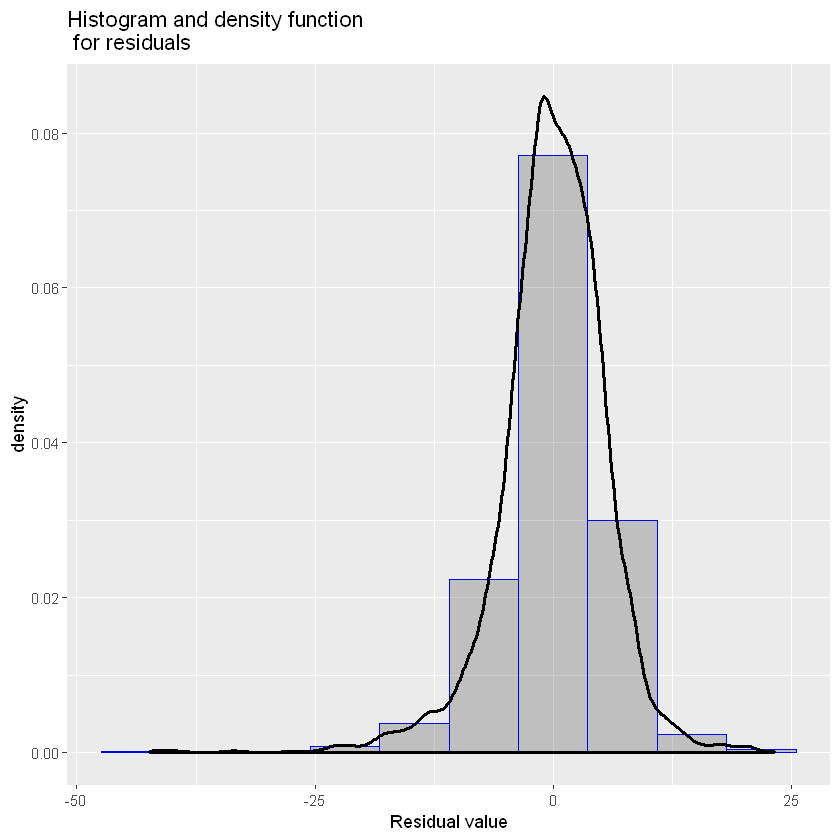

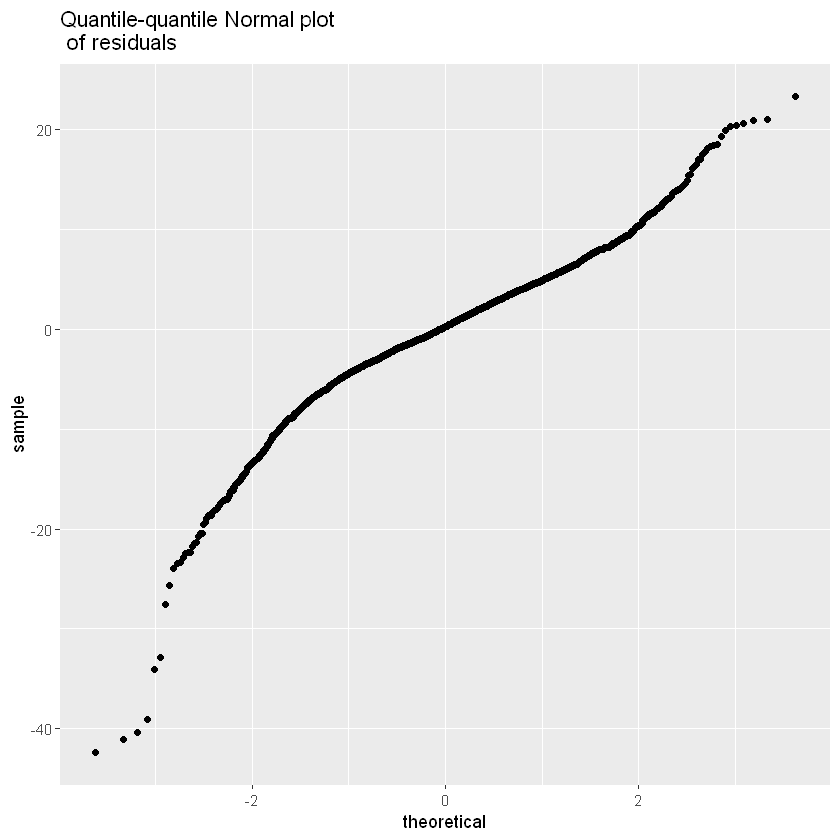

In [5]:
df1 <- storms %>% select(lat, long, wind,pressure,ts_diameter,hu_diameter)
df1 <- drop_na(df1)
# df1 %>% summary()
# normalize data
df1 <- df1 %>% 
  mutate(lat = normalize(lat), 
         long = normalize(long), 
         wind = normalize(wind),
         ts_diameter = normalize(ts_diameter),
         hu_diameter = normalize(hu_diameter)) 

#df1 %>% glimpse()

df1.mod <- lm(pressure ~ lat + long + wind 
              + ts_diameter  + hu_diameter, data = df1)
df1.mod %>% summary()
cat('The coefficient confidence intervals')
df1.mod %>% confint()

df1 <- df1 %>% 
  mutate(predicted = predict(df1.mod, data = df1),
         resids = pressure - predicted)

h1 <- df1 %>% 
  ggplot(aes(resids, ..density..)) + 
  geom_histogram(bins = 10, alpha = 0.3, color = 'blue') +
  geom_density(size = 1) +
  labs(title="Histogram and density function \n for residuals", x="Residual value")
print(h1)
# print QQ plot
p1 <- df1 %>% 
  ggplot(aes(sample = resids)) + 
  geom_qq() + 
  labs(title="Quantile-quantile Normal plot \n of residuals")
print(p1)

### Linear Regression Model 3
This is single regression model. Predicts wind using pressure.


Call:
lm(formula = wind ~ pressure, data = df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.229  -4.874   0.250   5.375  40.126 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  53.49500    0.08775   609.6   <2e-16 ***
pressure    -24.70000    0.08776  -281.5   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.78 on 10008 degrees of freedom
Multiple R-squared:  0.8878,	Adjusted R-squared:  0.8878 
F-statistic: 7.922e+04 on 1 and 10008 DF,  p-value: < 2.2e-16


The coefficient confidence intervals

,2.5 %,97.5 %
(Intercept),53.32299,53.66702
pressure,-24.87202,-24.52797


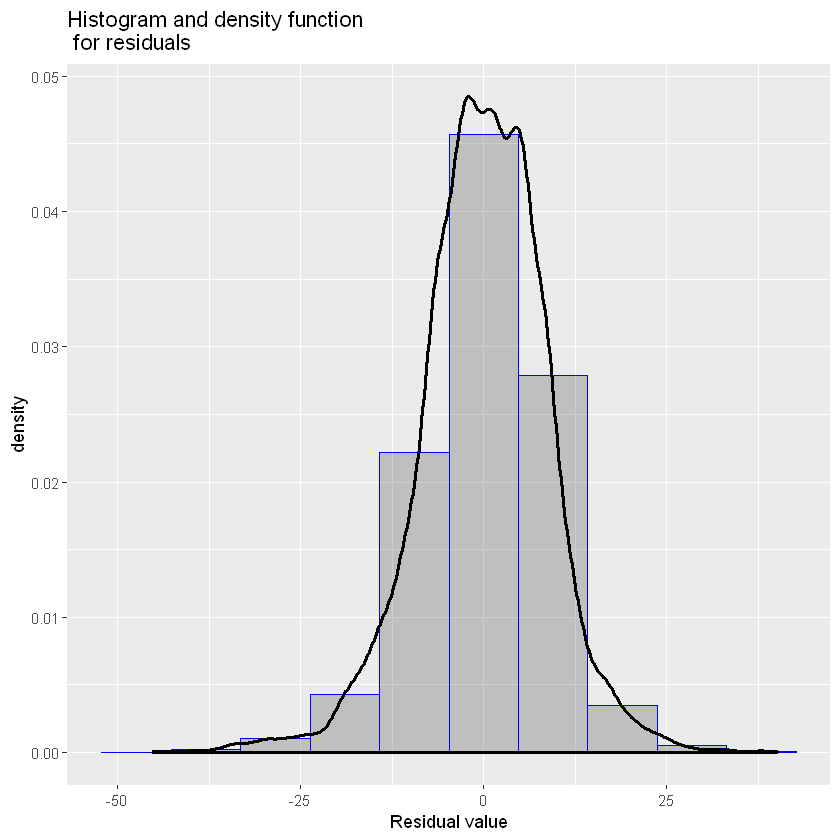

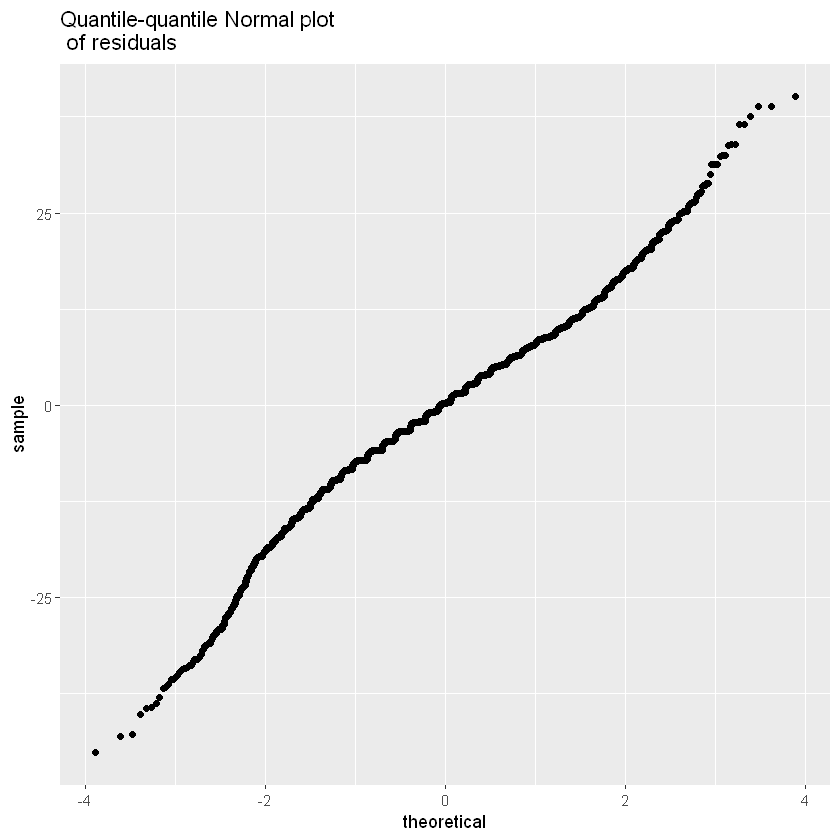

In [6]:
df2 <- storms %>% select(wind,pressure)
df12 <- drop_na(df2)
# df1 %>% summary()
# normalize data
df2 <- df2 %>% 
  mutate(pressure = normalize(pressure)) 

#df1 %>% glimpse()

df2.mod <- lm(wind ~ pressure, data = df2)
df2.mod %>% summary()
cat('The coefficient confidence intervals')
df2.mod %>% confint()

df2 <- df2 %>% 
  mutate(predicted = predict(df2.mod, data = df2),
         resids = wind - predicted)

h2 <- df2 %>% 
  ggplot(aes(resids, ..density..)) + 
  geom_histogram(bins = 10, alpha = 0.3, color = 'blue') +
  geom_density(size = 1) +
  labs(title="Histogram and density function \n for residuals", x="Residual value")
print(h2)
# print QQ plot
p2 <- df2 %>% 
  ggplot(aes(sample = resids)) + 
  geom_qq() + 
  labs(title="Quantile-quantile Normal plot \n of residuals")
print(p2)

### Analysis and Conclusions
- For Model 1 (predicts storm's wind) we can say that model looks like a good fit. All model coefficients are significant (large t-value, and small p-value). Also R squared is closer to 1 which is good. From the residuals histogram we can see normal distribution, and QQ plot shows prety much straight line. So model is a good fit.
- Model 2 (predicts storm's pressure) also looks like a good fit. All coefficients are significant, and R squared is even higher 0.91. Residuals distribution is normal.
- Model 3 is single regression model. Predicts wind using pressure value. This model is also prety much a good fit. Coefficients are significant, and R squared is 0.88 (close to 1). Residual distribution is normal.